In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
women_in_stem= pd.read_csv('/content/women_in_stem_.xlsx.csv')

first 5 lines of data

In [3]:
women_in_stem.head()

,Rank,City,Region,# of STEM jobs (2019),% STEM jobs (2019),# of STEM jobs change (2015-2019),% STEM jobs change (2015-2019),# Women in STEM (2019),% Women in STEM (2019),# Women in STEM change (2015-2019),% Women in STEM change (2015-2019),"Median STEM income (all, 2019)","Median STEM income change (all, 2015-2019)","Median STEM income (women, 2019)","Median STEM income change (women, 2015-2019)"
0,1,"New York, NY",Northeast,"215,699",5.20%,"36,763",0.90%,"68,650",31.80%,"14,382",1.50%,"$82,221",13.50%,"$75,923",22.20%
1,2,"San Francisco, CA",West,"84,856",15.70%,"24,124",3.70%,"23,644",27.90%,"9,690",4.90%,"$126,121",24.60%,"$101,852",24.00%
2,3,"Seattle, WA",West,"91,891",19.50%,"31,777",5.00%,"24,642",26.80%,"9,874",2.20%,"$109,402",25.60%,"$82,649",17.80%
3,4,"San Jose, CA",West,"95,647",17.60%,"22,810",3.50%,"24,718",25.80%,"8,080",3.00%,"$126,919",19.00%,"$107,978",19.60%
4,5,"Fremont, CA",West,"37,563",29.70%,"8,414",4.70%,"9,650",25.70%,"2,181",0.10%,"$122,191",14.70%,"$111,940",21.80%


In [4]:
women_in_stem.describe()

,Rank
count,120.000000
mean,60.500000
std,34.785054
min,1.000000
25%,30.750000
50%,60.500000
75%,90.250000
max,120.000000


Number of columns and rows

In [5]:
women_in_stem.shape

(120, 15)

about the data; data types etc

In [6]:
women_in_stem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Rank                                          120 non-null    int64 
 1   City                                          120 non-null    object
 2   Region                                        120 non-null    object
 3   # of STEM jobs (2019)                         120 non-null    object
 4   % STEM jobs (2019)                            120 non-null    object
 5   # of STEM jobs change (2015-2019)             120 non-null    object
 6   % STEM jobs change (2015-2019)                120 non-null    object
 7   # Women in STEM (2019)                        120 non-null    object
 8   % Women in STEM (2019)                        120 non-null    object
 9   # Women in STEM change (2015-2019)            120 non-null    object
 10  % 

In [7]:
women_in_stem.select_dtypes(["object"]).columns

Index(['City', 'Region', '# of STEM jobs (2019)', '% STEM jobs (2019)',
       '# of STEM jobs change (2015-2019)', '% STEM jobs change (2015-2019)',
       '# Women in STEM (2019)', '% Women in STEM (2019)',
       '# Women in STEM change (2015-2019)',
       '% Women in STEM change (2015-2019)', 'Median STEM income (all, 2019)',
       'Median STEM income change (all, 2015-2019)',
       'Median STEM income (women, 2019)',
       'Median STEM income change (women, 2015-2019)'],
      dtype='object')

to see if my data needs cleaning

In [8]:
women_in_stem.head(100)

,Rank,City,Region,# of STEM jobs (2019),% STEM jobs (2019),# of STEM jobs change (2015-2019),% STEM jobs change (2015-2019),# Women in STEM (2019),% Women in STEM (2019),# Women in STEM change (2015-2019),% Women in STEM change (2015-2019),"Median STEM income (all, 2019)","Median STEM income change (all, 2015-2019)","Median STEM income (women, 2019)","Median STEM income change (women, 2015-2019)"
0,1,"New York, NY",Northeast,"215,699",5.20%,"36,763",0.90%,"68,650",31.80%,"14,382",1.50%,"$82,221",13.50%,"$75,923",22.20%
1,2,"San Francisco, CA",West,"84,856",15.70%,"24,124",3.70%,"23,644",27.90%,"9,690",4.90%,"$126,121",24.60%,"$101,852",24.00%
2,3,"Seattle, WA",West,"91,891",19.50%,"31,777",5.00%,"24,642",26.80%,"9,874",2.20%,"$109,402",25.60%,"$82,649",17.80%
3,4,"San Jose, CA",West,"95,647",17.60%,"22,810",3.50%,"24,718",25.80%,"8,080",3.00%,"$126,919",19.00%,"$107,978",19.60%
4,5,"Fremont, CA",West,"37,563",29.70%,"8,414",4.70%,"9,650",25.70%,"2,181",0.10%,"$122,191",14.70%,"$111,940",21.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"Tulsa, OK",South,"9,450",4.90%,719,0.40%,"2,670",28.30%,392,2.20%,"$68,020",11.30%,"$46,250",-8.40%
96,97,"Moreno Valley, CA",West,"1,826",1.90%,-122,-0.30%,407,22.30%,-230,-10.40%,"$68,407",13.90%,"$65,815",31.20%
97,98,"Las Vegas, NV",West,"10,705",3.60%,"4,594",1.40%,"1,315",12.30%,-99,-10.90%,"$64,304",-9.20%,"$71,046",23.40%
98,99,"Toledo, OH",Midwest,"3,757",3.10%,-787,-0.50%,974,25.90%,-285,-1.80%,"$58,038",30.20%,"$38,745",51.60%


In [9]:
women_in_stem.select_dtypes(["float"]).columns

Index([], dtype='object')

In [10]:
women_in_stem = women_in_stem.rename(columns={'# of STEM jobs (2019)':'num_stem_jobs_2019',
                                              '% STEM jobs (2019)':'pct_stem_jobs_2019',
                                              '# of Women in STEM (2019)':'num_women_stem_2019',
                                              '% Women in STEM (2019)':'pct_women_stem_2019',
                                              '# of STEM jobs change (2015-2019)':'num_stem_jobs_change_2015_2019',
                                              '% STEM jobs change (2015-2019)':'pct_stem_jobs_change_2015_2019',
                                              '# of Women in STEM change (2015-2019)':'num_women_stem_change_2015_2019',
                                              '# Women in STEM (2019)':'num_women_stem_2019',
                                              '% Women in STEM (2019)':'pct_women_stem_2019',
                                              '# of STEM jobs change (2015-2019)':'num_stem_jobs_change_2015_2019',
                                              '# Women in STEM change (2015-2019)':'num_women_stem_change_2015_2019',
                                              '% Women in STEM change (2015-2019)':'pct_women_stem_change_2015_2019',
                                              'Median STEM income (all, 2019)':'median_stem_income_all_2019',
                                              'Median STEM income (women, 2019)':'median_stem_income_women_2019',
                                              'Median STEM income change (all, 2015-2019)':'pct_median_stem_income_change_all_2015_2019',
                                              'Median STEM income change (women, 2015-2019)':'pct_median_stem_income_change_women_2015_2019'
                                              })

In [11]:
women_in_stem.head()

,Rank,City,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019
0,1,"New York, NY",Northeast,"215,699",5.20%,"36,763",0.90%,"68,650",31.80%,"14,382",1.50%,"$82,221",13.50%,"$75,923",22.20%
1,2,"San Francisco, CA",West,"84,856",15.70%,"24,124",3.70%,"23,644",27.90%,"9,690",4.90%,"$126,121",24.60%,"$101,852",24.00%
2,3,"Seattle, WA",West,"91,891",19.50%,"31,777",5.00%,"24,642",26.80%,"9,874",2.20%,"$109,402",25.60%,"$82,649",17.80%
3,4,"San Jose, CA",West,"95,647",17.60%,"22,810",3.50%,"24,718",25.80%,"8,080",3.00%,"$126,919",19.00%,"$107,978",19.60%
4,5,"Fremont, CA",West,"37,563",29.70%,"8,414",4.70%,"9,650",25.70%,"2,181",0.10%,"$122,191",14.70%,"$111,940",21.80%


removeing special characters:

In [12]:
cols_to_clean = [
    'num_stem_jobs_2019', 'pct_stem_jobs_2019', 'num_stem_jobs_change_2015_2019',
    'pct_stem_jobs_change_2015_2019', 'num_women_stem_2019', 'pct_women_stem_2019',
    'num_women_stem_change_2015_2019', 'pct_women_stem_change_2015_2019',
    'median_stem_income_all_2019', 'pct_median_stem_income_change_all_2015_2019',
    'median_stem_income_women_2019', 'pct_median_stem_income_change_women_2015_2019'
]

In [13]:
for col in cols_to_clean:
  women_in_stem[col] = women_in_stem[col].astype(str).str.replace(r'[$,%]', '', regex=True)
  women_in_stem[col] = pd.to_numeric(women_in_stem[col], errors='coerce')

In [14]:
women_in_stem.head()

,Rank,City,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019
0,1,"New York, NY",Northeast,215699,5.2,36763,0.9,68650,31.8,14382,1.5,82221,13.5,75923.0,22.2
1,2,"San Francisco, CA",West,84856,15.7,24124,3.7,23644,27.9,9690,4.9,126121,24.6,101852.0,24.0
2,3,"Seattle, WA",West,91891,19.5,31777,5.0,24642,26.8,9874,2.2,109402,25.6,82649.0,17.8
3,4,"San Jose, CA",West,95647,17.6,22810,3.5,24718,25.8,8080,3.0,126919,19.0,107978.0,19.6
4,5,"Fremont, CA",West,37563,29.7,8414,4.7,9650,25.7,2181,0.1,122191,14.7,111940.0,21.8


In [15]:
women_in_stem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Rank                                           120 non-null    int64  
 1   City                                           120 non-null    object 
 2   Region                                         120 non-null    object 
 3   num_stem_jobs_2019                             120 non-null    int64  
 4   pct_stem_jobs_2019                             120 non-null    float64
 5   num_stem_jobs_change_2015_2019                 120 non-null    int64  
 6   pct_stem_jobs_change_2015_2019                 120 non-null    float64
 7   num_women_stem_2019                            120 non-null    int64  
 8   pct_women_stem_2019                            120 non-null    float64
 9   num_women_stem_change_2015_2019                120 non

splitting city into 2 columns:

In [16]:
women_in_stem[['CityName', 'State']] = women_in_stem['City'].str.split(', ', expand=True)

In [17]:
women_in_stem.head()

,Rank,City,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019,CityName,State
0,1,"New York, NY",Northeast,215699,5.2,36763,0.9,68650,31.8,14382,1.5,82221,13.5,75923.0,22.2,New York,NY
1,2,"San Francisco, CA",West,84856,15.7,24124,3.7,23644,27.9,9690,4.9,126121,24.6,101852.0,24.0,San Francisco,CA
2,3,"Seattle, WA",West,91891,19.5,31777,5.0,24642,26.8,9874,2.2,109402,25.6,82649.0,17.8,Seattle,WA
3,4,"San Jose, CA",West,95647,17.6,22810,3.5,24718,25.8,8080,3.0,126919,19.0,107978.0,19.6,San Jose,CA
4,5,"Fremont, CA",West,37563,29.7,8414,4.7,9650,25.7,2181,0.1,122191,14.7,111940.0,21.8,Fremont,CA


In [18]:
cols=list(women_in_stem.columns)

In [19]:
cols.remove('CityName')
cols.remove('State')

In [20]:
city_index = cols.index('City')
cols.insert(city_index + 1, 'State')
cols.insert(city_index + 1, 'CityName')

In [21]:
women_in_stem = women_in_stem[cols]

In [22]:
women_in_stem.head()

,Rank,City,CityName,State,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019
0,1,"New York, NY",New York,NY,Northeast,215699,5.2,36763,0.9,68650,31.8,14382,1.5,82221,13.5,75923.0,22.2
1,2,"San Francisco, CA",San Francisco,CA,West,84856,15.7,24124,3.7,23644,27.9,9690,4.9,126121,24.6,101852.0,24.0
2,3,"Seattle, WA",Seattle,WA,West,91891,19.5,31777,5.0,24642,26.8,9874,2.2,109402,25.6,82649.0,17.8
3,4,"San Jose, CA",San Jose,CA,West,95647,17.6,22810,3.5,24718,25.8,8080,3.0,126919,19.0,107978.0,19.6
4,5,"Fremont, CA",Fremont,CA,West,37563,29.7,8414,4.7,9650,25.7,2181,0.1,122191,14.7,111940.0,21.8


In [23]:
women_in_stem = women_in_stem.drop(columns=['City'])

In [24]:
women_in_stem.head()

,Rank,CityName,State,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019
0,1,New York,NY,Northeast,215699,5.2,36763,0.9,68650,31.8,14382,1.5,82221,13.5,75923.0,22.2
1,2,San Francisco,CA,West,84856,15.7,24124,3.7,23644,27.9,9690,4.9,126121,24.6,101852.0,24.0
2,3,Seattle,WA,West,91891,19.5,31777,5.0,24642,26.8,9874,2.2,109402,25.6,82649.0,17.8
3,4,San Jose,CA,West,95647,17.6,22810,3.5,24718,25.8,8080,3.0,126919,19.0,107978.0,19.6
4,5,Fremont,CA,West,37563,29.7,8414,4.7,9650,25.7,2181,0.1,122191,14.7,111940.0,21.8


missing values:

In [25]:
women_in_stem.isnull()

,Rank,CityName,State,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
women_in_stem.isnull().sum()

,0
Rank,0
CityName,0
State,0
Region,0
num_stem_jobs_2019,0
pct_stem_jobs_2019,0
num_stem_jobs_change_2015_2019,0
pct_stem_jobs_change_2015_2019,0
num_women_stem_2019,0
pct_women_stem_2019,0


In [27]:
women_in_stem = women_in_stem.dropna()

In [28]:
women_in_stem.isnull().sum()

,0
Rank,0
CityName,0
State,0
Region,0
num_stem_jobs_2019,0
pct_stem_jobs_2019,0
num_stem_jobs_change_2015_2019,0
pct_stem_jobs_change_2015_2019,0
num_women_stem_2019,0
pct_women_stem_2019,0


for duplicates

In [29]:
women_in_stem.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
114,False
115,False
116,False
117,False


In [30]:
women_in_stem.drop_duplicates()

,Rank,CityName,State,Region,num_stem_jobs_2019,pct_stem_jobs_2019,num_stem_jobs_change_2015_2019,pct_stem_jobs_change_2015_2019,num_women_stem_2019,pct_women_stem_2019,num_women_stem_change_2015_2019,pct_women_stem_change_2015_2019,median_stem_income_all_2019,pct_median_stem_income_change_all_2015_2019,median_stem_income_women_2019,pct_median_stem_income_change_women_2015_2019
0,1,New York,NY,Northeast,215699,5.2,36763,0.9,68650,31.8,14382,1.5,82221,13.5,75923.0,22.2
1,2,San Francisco,CA,West,84856,15.7,24124,3.7,23644,27.9,9690,4.9,126121,24.6,101852.0,24.0
2,3,Seattle,WA,West,91891,19.5,31777,5.0,24642,26.8,9874,2.2,109402,25.6,82649.0,17.8
3,4,San Jose,CA,West,95647,17.6,22810,3.5,24718,25.8,8080,3.0,126919,19.0,107978.0,19.6
4,5,Fremont,CA,West,37563,29.7,8414,4.7,9650,25.7,2181,0.1,122191,14.7,111940.0,21.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,Rochester,NY,Northeast,5675,5.9,2542,2.3,1200,21.1,533,-0.1,51195,0.1,32000.0,-29.9
115,116,Newark,NJ,Northeast,2702,2.2,489,0.2,453,16.8,-392,-21.4,66209,6.8,54375.0,-11.7
116,117,El Paso,TX,South,8764,2.9,-1400,-0.6,2419,27.6,-778,-3.9,49711,-2.6,40705.0,-19.2
117,118,Birmingham,AL,South,3267,3.4,466,0.5,862,26.4,-161,-10.1,55384,-6.2,31689.0,-39.5


for outliers

In [31]:
col_name = 'num_stem_jobs_2019'

In [32]:
Q1 = women_in_stem[col_name].quantile(0.25)
Q3 = women_in_stem[col_name].quantile(0.75)
IQR = Q3 - Q1

In [33]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [34]:
outliers = women_in_stem[(women_in_stem[col_name] < lower_limit) | (women_in_stem[col_name] > upper_limit)]

In [35]:
print(f"Outliers in '{col_name}':")
print(outliers)

Outliers in 'num_stem_jobs_2019':
    Rank       CityName State     Region  num_stem_jobs_2019  \
0      1       New York    NY  Northeast              215699   
1      2  San Francisco    CA       West               84856   
2      3        Seattle    WA       West               91891   
3      4       San Jose    CA       West               95647   
5      6      San Diego    CA       West               91810   
6      7        Chicago    IL    Midwest               95120   
9     10    Los Angeles    CA       West               98582   
10    11     Washington    DC      South               49061   
11    12         Austin    TX      South               73015   
18    19        Houston    TX      South               79573   
19    20        Phoenix    AZ       West               51572   

    pct_stem_jobs_2019  num_stem_jobs_change_2015_2019  \
0                  5.2                           36763   
1                 15.7                           24124   
2                 19.5 

In [36]:
print (f"There are {len(outliers)} outliers in {col_name}")

There are 11 outliers in num_stem_jobs_2019


In [37]:
col_name = 'pct_stem_jobs_2019'
Q1 = women_in_stem[col_name].quantile(0.25)
Q3 = women_in_stem[col_name].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = women_in_stem[(women_in_stem[col_name] < lower_limit) | (women_in_stem[col_name] > upper_limit)]
print (f"There are {len(outliers)} outliers in {col_name}")

There are 6 outliers in pct_stem_jobs_2019


In [38]:
col_name = 'num_stem_jobs_change_2015_2019'
Q1 = women_in_stem[col_name].quantile(0.25)
Q3 = women_in_stem[col_name].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = women_in_stem[(women_in_stem[col_name] < lower_limit) | (women_in_stem[col_name] > upper_limit)]
print (f"There are {len(outliers)} outliers in {col_name}")

There are 9 outliers in num_stem_jobs_change_2015_2019


In [39]:
col_name = 'median_stem_income_all_2019'
Q1 = women_in_stem[col_name].quantile(0.25)
Q3 = women_in_stem[col_name].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = women_in_stem[(women_in_stem[col_name] < lower_limit) | (women_in_stem[col_name] > upper_limit)]
print (f"There are {len(outliers)} outliers in {col_name}")

There are 6 outliers in median_stem_income_all_2019


In [40]:
col_name = 'num_women_stem_change_2015_2019'
Q1 = women_in_stem[col_name].quantile(0.25)
Q3 = women_in_stem[col_name].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = women_in_stem[(women_in_stem[col_name] < lower_limit) | (women_in_stem[col_name] > upper_limit)]
print (f"There are {len(outliers)} outliers in {col_name}")

There are 10 outliers in num_women_stem_change_2015_2019


In [41]:
col_name = 'pct_median_stem_income_change_women_2015_2019'
Q1 = women_in_stem[col_name].quantile(0.25)
Q3 = women_in_stem[col_name].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = women_in_stem[(women_in_stem[col_name] < lower_limit) | (women_in_stem[col_name] > upper_limit)]
print (f"There are {len(outliers)} outliers in {col_name}")

There are 2 outliers in pct_median_stem_income_change_women_2015_2019


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
number_columns = women_in_stem.select_dtypes(include=['number']).columns
number_columns =[c for c in number_columns if c!= 'Rank']

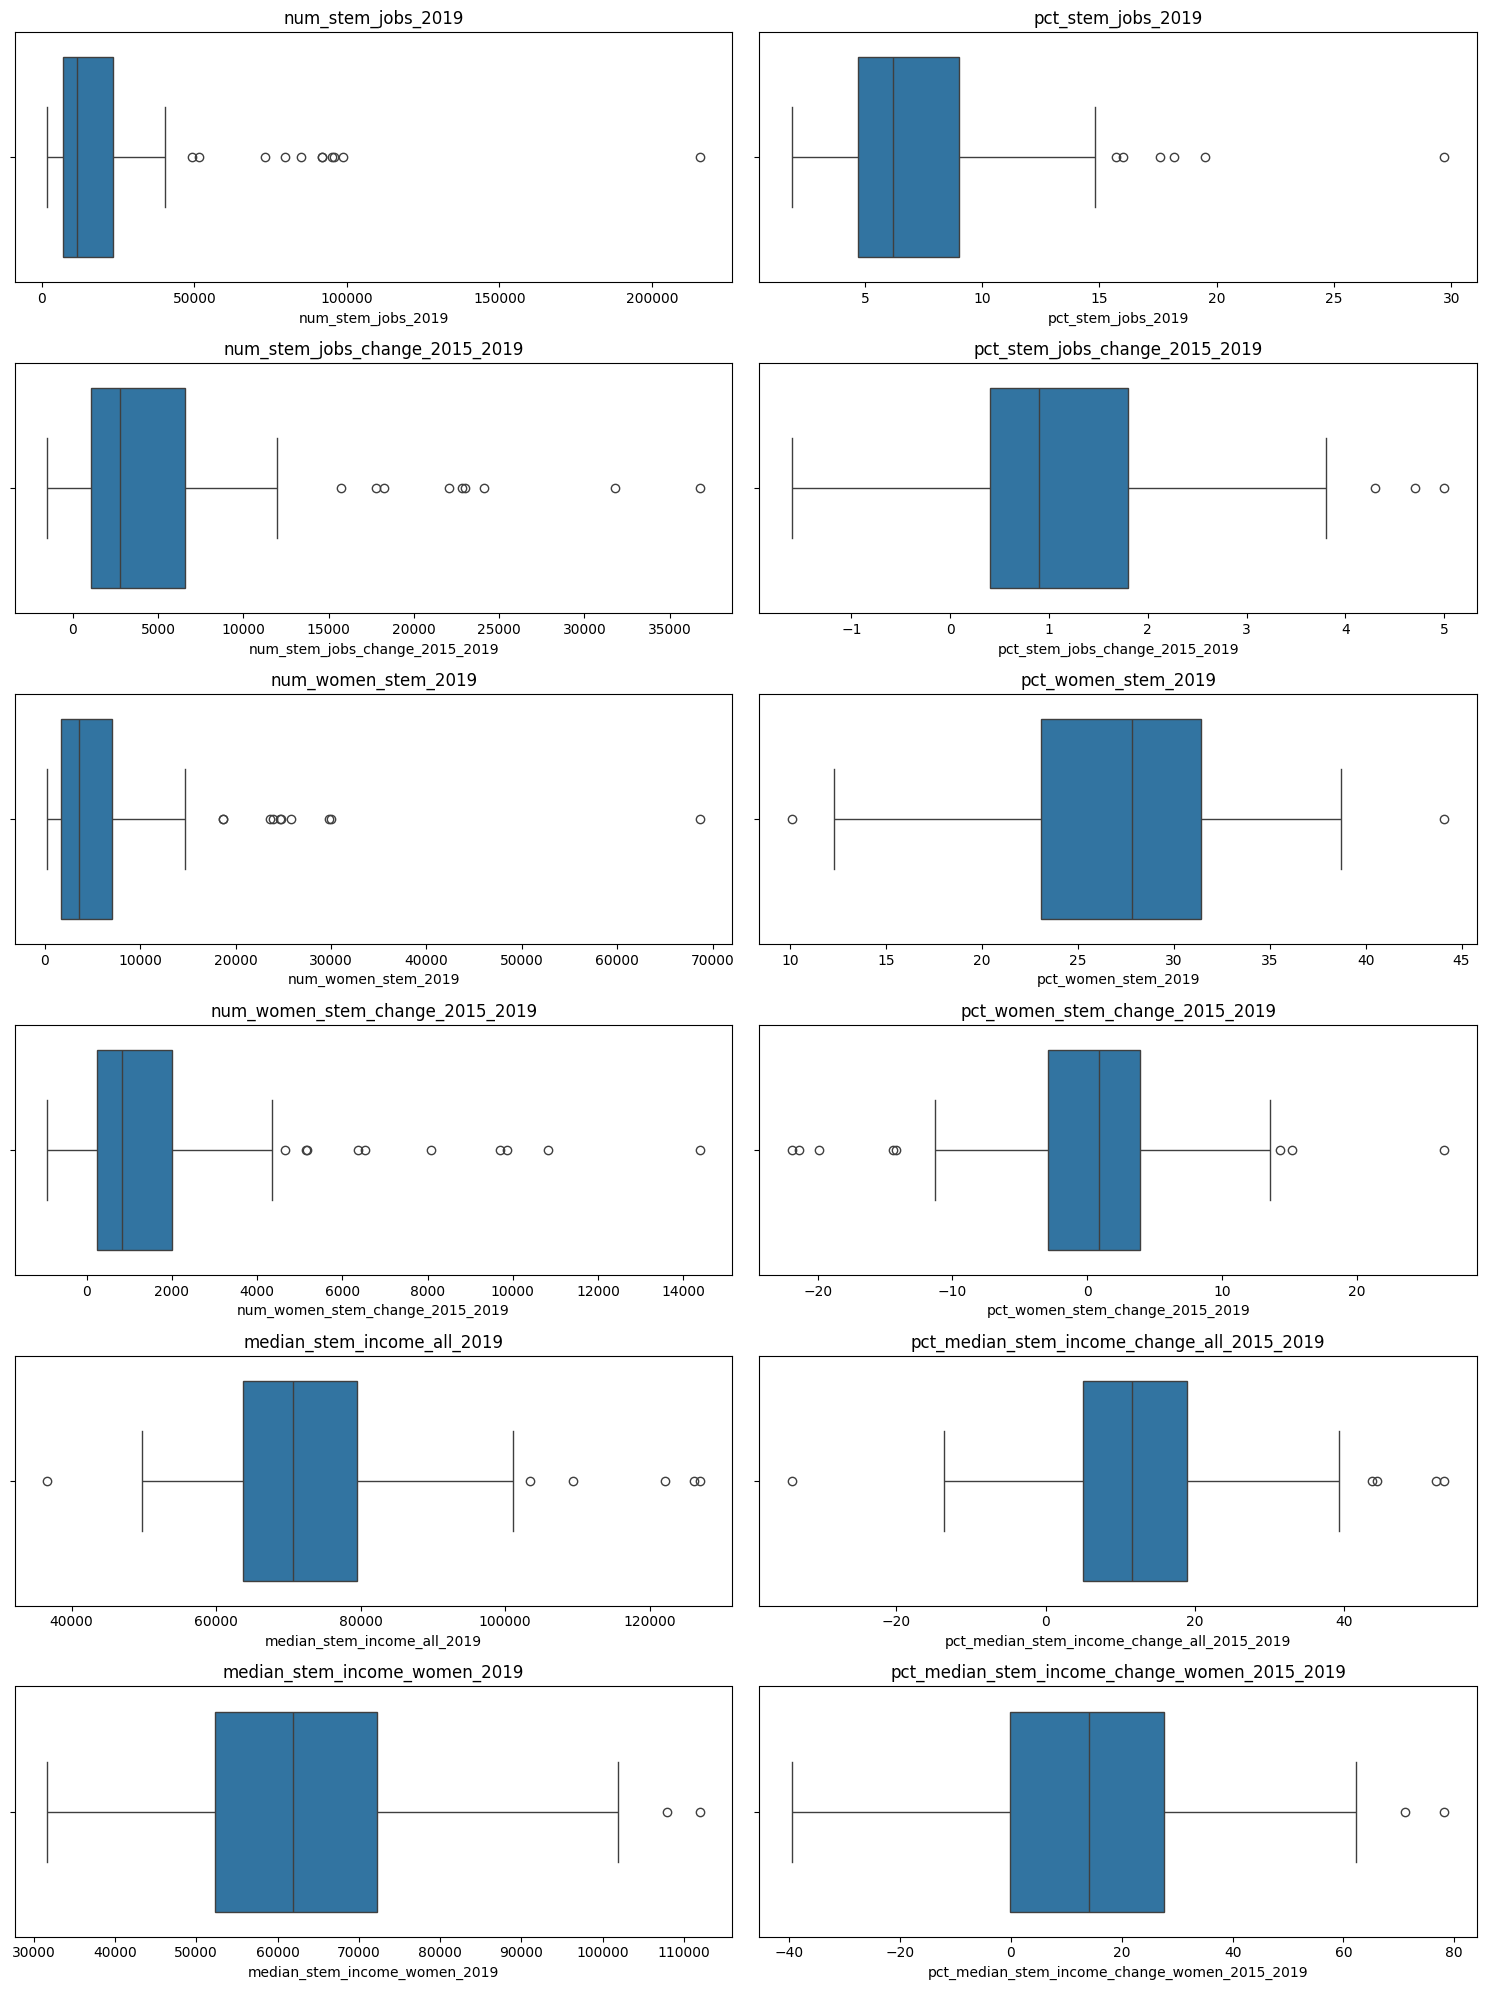

In [44]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(number_columns, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=women_in_stem[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [45]:
from google.colab import files
women_in_stem.to_csv('women_in_stem.csv', index=False)
files.download('women_in_stem.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>